## [Computational Social Science] Project 5: Natural Language Processing

In this project, you will use natural language processing techniques to explore a dataset containing tweets from members of the 116th United States Congress that met from January 3, 2019 to January 2, 2021. The dataset has also been cleaned to contain information about each legislator. Concretely, you will do the following:

* Preprocess the text of legislators' tweets
* Conduct Exploratory Data Analysis of the text
* Use sentiment analysis to explore differences between legislators' tweets
* Featurize text with manual feature engineering, frequency-based, and vector-based techniques
* Predict legislators' political parties and whether they are a Senator or Representative

You will explore two questions that relate to two central findings in political science and examine how they relate to the text of legislators' tweets. First, political scientists have argued that U.S. politics is currently highly polarized relative to other periods in American history, but also that the polarization is asymmetric. Historically, there were several conservative Democrats (i.e. "blue dog Democrats") and liberal Republicans (i.e. "Rockefeller Republicans"), as measured by popular measurement tools like [DW-NOMINATE](https://en.wikipedia.org/wiki/NOMINATE_(scaling_method)#:~:text=DW\%2DNOMINATE\%20scores\%20have\%20been,in\%20the\%20liberal\%2Dconservative\%20scale.). However, in the last few years, there are few if any examples of any Democrat in Congress being further to the right than any Republican and vice versa. At the same time, scholars have argued that this polarization is mostly a function of the Republican party moving further right than the Democratic party has moved left. **Does this sort of asymmetric polarization show up in how politicians communicate to their constituents through tweets?**

Second, the U.S. Congress is a bicameral legislature, and there has long been debate about partisanship in the Senate versus the House. The House of Representatives is apportioned by population and all members serve two year terms. In the Senate, each state receives two Senators and each Senator serves a term of six years. For a variety of reasons (smaller chamber size, more insulation from the voters, rules and norms like the filibuster, etc.), the Senate has been argued to be the "cooling saucer" of Congress in that it is more bipartisan and moderate than the House. **Does the theory that the Senate is more moderate have support in Senators' tweets?**

**Note**: See the project handout for more details on caveats and the data dictionary.

In [2]:
# installation
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install textblob
#!pip install wordcloud

# pandas and numpy
import pandas as pd
import numpy as numpy
import numpy as np

# punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()

# textblob
from textblob import TextBlob

# countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# gensim
import gensim
from gensim import models

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# wordcloud
from wordcloud import WordCloud

In [3]:
# load data 
# ----------
congress_tweets = pd.read_csv("/Users/sarongoitom/Downloads/data 2/116th Congressional Tweets and Demographics.csv")
# fill in this line of code with a sufficient number of tweets, depending on your computational resources
#congress_tweets = congress_tweets.sample(...)
congress_tweets.head()

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"


## Preprocessing

The first step in working with text data is to preprocess it. Make sure you do the following:

* Remove punctuation and stop words. The `rem_punc_stop()` function we used in lab is provided to you but you should feel free to edit it as necessary for other steps
* Remove tokens that occur frequently in tweets, but may not be helpful for downstream classification. For instance, many tweets contain a flag for retweeting, or share a URL 

As you search online, you might run into solutions that rely on regular expressions. You are free to use these, but you should also be able to preprocess using the techniques we covered in lab. Specifically, we encourage you to use spaCy's token attributes and string methods to do some of this text preprocessing.

In [35]:
def rem_punc_stop(text):
    stop_words = STOP_WORDS
    punc = set(punctuation)
    
    punc_free = "".join([ch for ch in text if ch not in punc])
    
    doc = nlp(punc_free)
    
    spacy_words = [token.text for token in doc]
    
    spacy_words = [word for word in spacy_words if not word.startswith('http')]
    
    no_punc = [word for word in spacy_words if word not in stop_words]
    
    return no_punc

In [36]:
# now apply the function to all the columns in our dataframe
# ----------
congress_tweets['tokens'] = congress_tweets['text'].map(lambda x: rem_punc_stop(x)) # can use apply here 
#congress_tweets['tokens'] # visualize

## Exploratory Data Analysis

Use two of the techniques we covered in lab (or other techniques outside of lab!) to explore the text of the tweets. You should construct these visualizations with an eye toward the eventual classification tasks: (1) predicting the legislator's political party based on the text of their tweet, and (2) predicting whether the legislator is a Senator or Representative. As a reminder, in lab we covered word frequencies, word clouds, word/character counts, scattertext, and topic modeling as possible exploration tools. 

### EDA 1

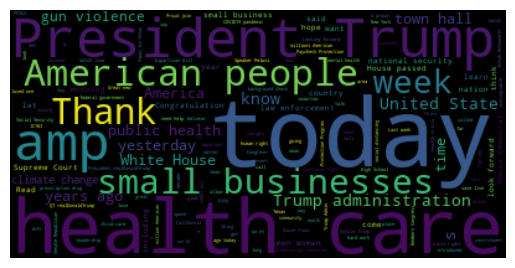

In [20]:
# now apply the function to all the columns in our dataframe
# ----------
# apply function to text object
text = ' '.join(congress_tweets['tokens'].map(lambda text: ' '.join(text)))

# create WordCloud visualization using the "text" object 
wordcloud = WordCloud(random_state=40).generate(text) # set random state to ensure same word cloud each time

# plot 
plt.imshow(wordcloud,                  # specify wordcloud
           interpolation = 'bilinear') # specifies how the words are displayed
plt.axis('off')                        # turn off axes
plt.show() 

In [18]:
#check the new 'tokens' column
congress_tweets.head()

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,tokens
0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925","[Great, news, Baldwin, County, The, economy, S..."
1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925","[Outstanding, news, today, Airbus, JetBlue, or..."
2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925","[RT, senatemajldr, Democrats, border, security..."
3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925","[Here, sign, things, come, As, Democrats, Hous..."
4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925","[Lets, understand, dealing, border, security, ..."


### EDA 2

In [21]:
# create new feature columns with counts of # of characters and # of words
# ----------

# count number of characters
congress_tweets['tweet_len'] = congress_tweets['tokens'].apply(len)

# count number of words
congress_tweets['word_count'] = congress_tweets['tokens'].apply(lambda x: len(str(x).split()))


/Users/sarongoitom/anaconda3/envs/CSS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


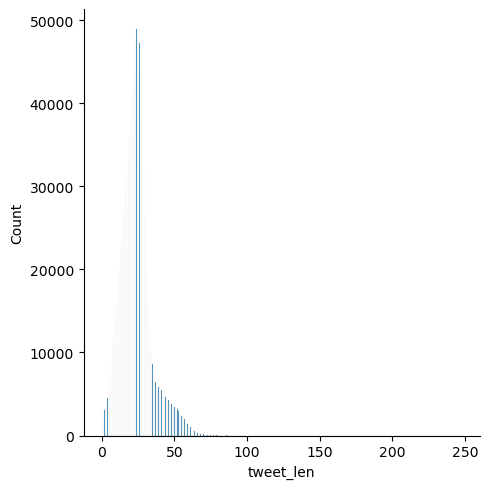

In [22]:
# create histogram of complaint length (number of characters)
sns.displot(congress_tweets,              # specify data
            x="tweet_len") # x-axis feature
plt.show()

In [2]:
# create histogram of word count
sns.displot(congress_tweets,           # specify data 
            x="word_count") # x-axis feature
plt.show()

NameError: name 'sns' is not defined

## Sentiment Analysis

Next, let's analyze the sentiments contained within the tweets. You may use TextBlob or another library for these tasks. Do the following:

* Choose two legislators, one who you think will be more liberal and one who you think will be more conservative, and analyze their sentiment and/or subjectivity scores per tweet. For instance, you might do two scatterplots that plot each legislator's sentiment against their subjectivity, or two density plots for their sentiments. Do the scores match what you thought?
* Plot two more visualizations like the ones you chose in the first part, but do them to compare (1) Democrats v. Republicans and (2) Senators v. Representatives 

`TextBlob` has already been imported in the top cell.

In [68]:
# create a feature colum of sentiment polarity
# ---------- 
# create the "tokens" column again 
congress_tweets['tokens'] = congress_tweets['tokens'].map(lambda text: ' '.join(text))

# create the "tokens" column again 
congress_tweets['polarity'] = congress_tweets['tokens'].map(lambda text: TextBlob(text).sentiment.polarity)

# view
congress_tweets.head()

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share,tokens,tweet_len,word_count,polarity
0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",Great news Baldwin County The economy Southwes...,20,20,0.600000
1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",Outstanding news today Airbus JetBlue ordering...,34,34,0.500000
2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",RT senatemajldr Democrats border security gove...,27,27,0.000000
3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",Here sign things come As Democrats House takin...,35,35,-0.024242
4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925",Lets understand dealing border security nation...,10,10,0.000000


/Users/sarongoitom/anaconda3/envs/CSS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


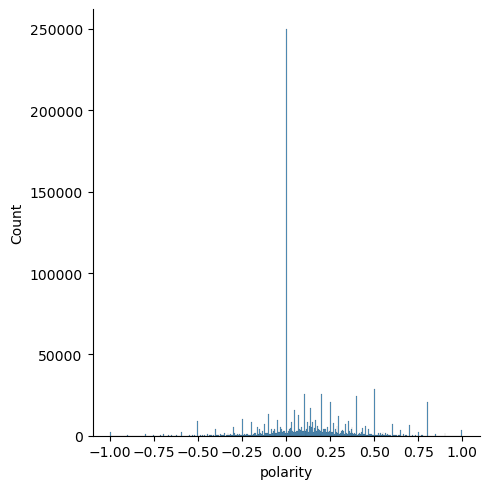

In [9]:
# histogram of polarity
sns.displot(congress_tweets,         # specify data
            x="polarity") # x-axis label 
plt.show()

/Users/sarongoitom/anaconda3/envs/CSS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


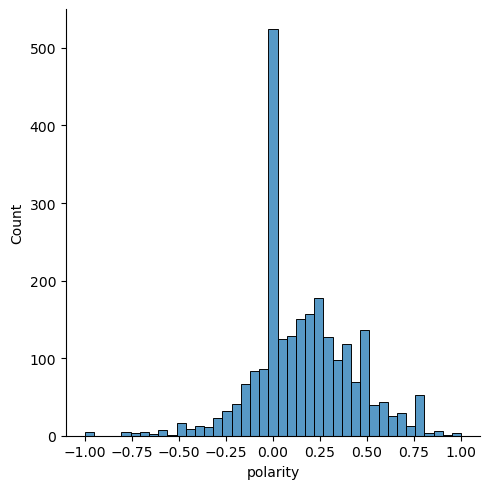

In [13]:
# Representative Bradley Byrne
filtered_data = congress_tweets[congress_tweets['screen_name'] == 'RepByrne']

# Create the scatter plot for the filtered data
#sns.scatterplot(data=filtered_data, x='x_variable', y='y_variable')
#plt.show()

sns.displot(filtered_data,            # specify data
            x="polarity") 


In [17]:
levels = congress_tweets['screen_name'].unique()
print(levels)

levels1 = congress_tweets['position'].unique()
print(levels1)

levels2 = congress_tweets['party'].unique()
print(levels2)

['RepByrne' 'RepTerriSewell' 'RepMikeRogersAL' 'RepMoBrooks' 'SenShelby'
 'RepMarthaRoby' 'USRepGaryPalmer' 'Robert_Aderholt' 'SenDanSullivan'
 'RepDLesko' 'RepGosar' 'RepAndyBiggsAZ' 'SenatorSinema' 'RepDavid'
 'RepRubenGallego' 'SenMcSallyAZ' 'RepKirkpatrick' 'RepGregStanton'
 'RepFrenchHill' 'JohnBoozman' 'RepWesterman' 'SenTomCotton'
 'RepRickCrawford' 'SenKamalaHarris' 'SenFeinstein' 'RepSwalwell'
 'BradSherman' 'RepJimmyGomez' 'RepScottPeters' 'RepTedLieu' 'RepSpeier'
 'RepBarragan' 'RepJoshHarder' 'RepDeSaulnier' 'KenCalvert' 'RepLaMalfa'
 'RepJudyChu' 'RepRoybalAllard' 'RepGaramendi' 'RepLindaSanchez'
 'RepCarbajal' 'RepZoeLofgren' 'RepCardenas' 'RepBarbaraLee'
 'RepAdamSchiff' 'Rep_Hunter' 'SpeakerPelosi' 'RepJimmyPanetta'
 'RepHarley' 'RepKarenBass' 'RepRoKhanna' 'GOPLeader' 'RepThompson'
 'DorisMatsui' 'RepHuffman' 'RepMarkTakano' 'RepLowenthal' 'NormaJTorres'
 'RepMikeLevin' 'RepTjCox' 'RepJuanVargas' 'RepKatiePorter'
 'RepGilCisneros' 'RepBera' 'RepJimCosta' 'RepMcNerney' 

/Users/sarongoitom/anaconda3/envs/CSS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


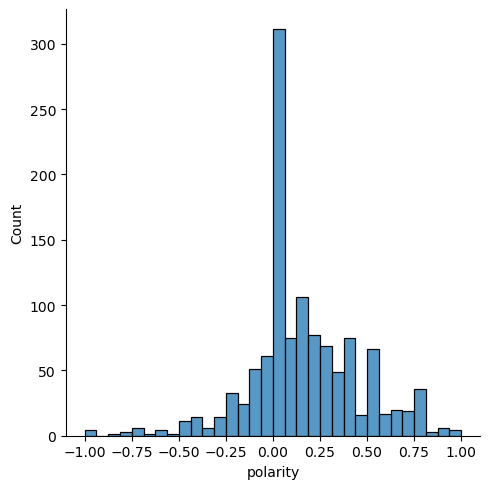

In [16]:
# Senator John Kennedy
filtered_data = congress_tweets[congress_tweets['screen_name'] == 'SenJohnKennedy']

# Create the scatter plot for the filtered data
#sns.scatterplot(data=filtered_data, x='x_variable', y='y_variable')
#plt.show()

sns.displot(filtered_data,            # specify data
            x="polarity") 


/Users/sarongoitom/anaconda3/envs/CSS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


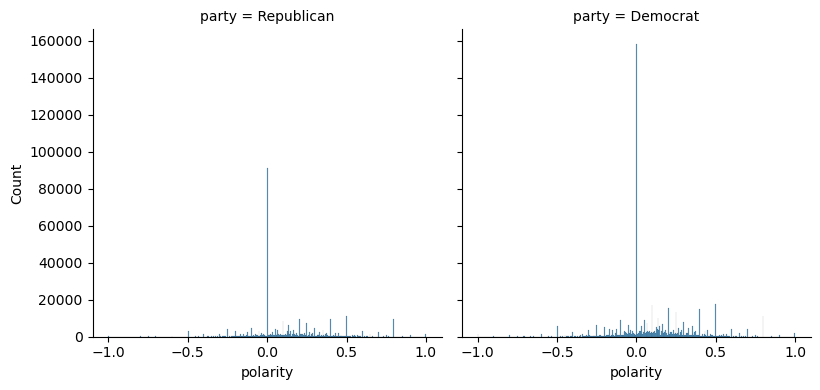

In [22]:
# Histogram comparing demorats vs republicans
filtered_data = congress_tweets[congress_tweets['party'] != 'Independent']

g = sns.displot(filtered_data, x='polarity', col='party', col_wrap=3, height=4)
plt.show()

/Users/sarongoitom/anaconda3/envs/CSS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


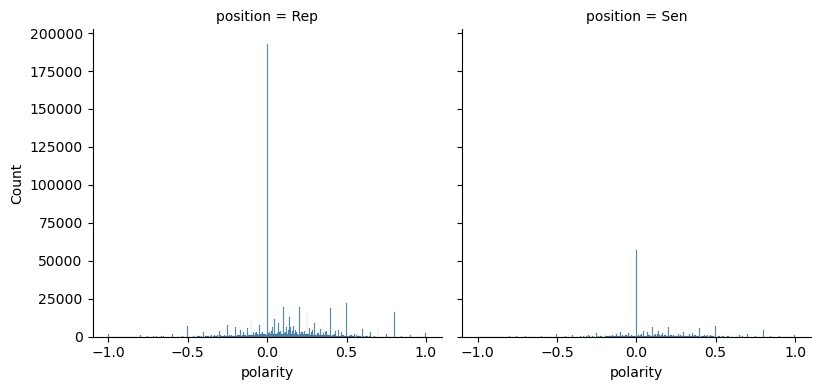

In [21]:
# Histogram comparing senators vs representatives
g = sns.displot(congress_tweets, x='polarity', col='position', col_wrap=3, height=4)
plt.show()

## Featurization

Before going to classification, explore different featurization techniques. Create three dataframes or arrays to represent your text features, specifically:

* Features engineered from your previous analysis. For example, word counts, sentiment scores, topic model etc.
* A term frequency-inverse document frequency matrix. 
* An embedding-based featurization (like a document averaged word2vec)

In the next section, you will experiment with each of these featurization techniques to see which one produces the best classifications.

In [30]:
# load and process data
# ---------- 
congress_tweets = pd.read_csv("116th Congressional Tweets and Demographics.csv")
congress_tweets = congress_tweets.dropna(subset = ['text'])
congress_tweets = congress_tweets[(congress_tweets['party']=='Democrat') | (congress_tweets['party'] == 'Republican')]
congress_tweets = congress_tweets[:1000]

### Engineered Text Features

In [65]:
# find the character count for each document 
# --------
# apply length function to tokens column to count each character
congress_tweets['tweet_len'] = congress_tweets['tokens'].apply(len)

# view the new feature we just created
congress_tweets[['tokens', 'tweet_len']]

,tokens,tweet_len
0,"[Great, news, Baldwin, County, The, economy, S...",20
1,"[Outstanding, news, today, Airbus, JetBlue, or...",34
2,"[RT, senatemajldr, Democrats, border, security...",27
3,"[Here, sign, things, come, As, Democrats, Hous...",35
4,"[Lets, understand, dealing, border, security, ...",10
...,...,...
995,"[Important, conversation, afternoon, Father, B...",19
996,"[I, believe, Rep, Ilhan, Omar, recent, antiSem...",25
997,"[RT, ALReporter, Brooks, Democrats, interested...",8
998,"[Our, Opelika, District, Office, intern, Madis...",20


In [66]:
# find the word count for each document 
# --------
# apply length function to tokens column to count words -- you will need to split the text to count words
congress_tweets['word_count'] = congress_tweets['tokens'].apply(lambda x: len(str(x).split()))

# view
congress_tweets[['tokens', 'tweet_len', 'word_count']]

,tokens,tweet_len,word_count
0,"[Great, news, Baldwin, County, The, economy, S...",20,20
1,"[Outstanding, news, today, Airbus, JetBlue, or...",34,34
2,"[RT, senatemajldr, Democrats, border, security...",27,27
3,"[Here, sign, things, come, As, Democrats, Hous...",35,35
4,"[Lets, understand, dealing, border, security, ...",10,10
...,...,...,...
995,"[Important, conversation, afternoon, Father, B...",19,19
996,"[I, believe, Rep, Ilhan, Omar, recent, antiSem...",25,25
997,"[RT, ALReporter, Brooks, Democrats, interested...",8,8
998,"[Our, Opelika, District, Office, intern, Madis...",20,21


### Bag-of-words or Tf-idf

In [31]:
# Frequency Based featurization
# create tf-idf matrix
# ----------
# set X dataset
X = congress_tweets['text']        

# initialize tf-idf using our preprocessing function
tf = TfidfVectorizer(tokenizer = rem_punc_stop, # use our function for tokenizing created above
                     token_pattern = None)      # set to "None" since we have specify our own pattern

# fit and transform data
tfidf_matrix =  tf.fit_transform(X)

# create dense matrix just to view
dense_matrix = tfidf_matrix.todense()
dense_matrix 

matrix([[0.13853145, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.06996986, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.22195531, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [32]:
# create a useful visualization of tf-idf matrix
# ----------

# convert matrix to an arrray and then to a dataframe
tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(),       # convert to array than to datafram
                         columns=tf.get_feature_names_out()) # specify column names as feature names from TF vectorizer

# sort by term frequency on the first document
tfidf_df.T.nlargest(10,  # transpose the matrix = columns become documents and rows are words
                     0)  # on column index 0 to show the largest

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
boom,0.346493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
baldwin,0.313208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
progrowth,0.313208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thrive,0.302493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
economy,0.240982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
policies,0.240982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
southwest,0.240982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
continues,0.233580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
economic,0.227168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
proud,0.225208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word Embedding

In [70]:
# Load Word2Vec model from Google; OPTIONAL depending on your computational resources (the file is ~1 GB)
# Also note that this file path assumes that the word vectors are underneath 'data'; you may wish to point to the CSS course repo and change the path
# or move the vector file to the project repo 

model = gensim.models.KeyedVectors.load_word2vec_format('/Users/sarongoitom/Downloads/GoogleNews-vectors-negative300.bin.gz', binary = True) 

In [72]:
# apply CBOW Word2vec model to our congress_tweets data 
# ----------
model = gensim.models.Word2Vec(congress_tweets['tokens'],    # specify data - sentences
                               vector_size=100,   # set embedding size at 100
                               window=5,          # max distance between current and predicted word
                               min_count=5,       # ignores words with freq fewer than this threshold
                               sg=0,              # specify Continuous Bag of Words Algorithim
                               alpha=0.025,       # learning rate
                               epochs = 5,        # iterations
                               seed = 1,          # set random seed (same as random_state in sklearn )
                               batch_words=10000, # sample size 
                               workers = 1)       # set cores to 1 to ensure this embeddings are fully reproducible

In [73]:
help(model.build_vocab_from_freq)

Help on method build_vocab_from_freq in module gensim.models.word2vec:

build_vocab_from_freq(word_freq, keep_raw_vocab=False, corpus_count=None, trim_rule=None, update=False) method of gensim.models.word2vec.Word2Vec instance
    Build vocabulary from a dictionary of word frequencies.
    
    Parameters
    ----------
    word_freq : dict of (str, int)
        A mapping from a word in the vocabulary to its frequency count.
    keep_raw_vocab : bool, optional
        If False, delete the raw vocabulary after the scaling is done to free up RAM.
    corpus_count : int, optional
        Even if no corpus is provided, this argument can set corpus_count explicitly.
    trim_rule : function, optional
        Vocabulary trimming rule, specifies whether certain words should remain in the vocabulary,
        be trimmed away, or handled using the default (discard if word count < min_count).
        Can be None (min_count will be used, look to :func:`~gensim.utils.keep_vocab_item`),
        or a

In [41]:
# return a list of word for which we have calculations
# ----------
words = list(model.wv.index_to_key)
print(words[0:100]) 

['I', 'RT', '\n', ' ', 'amp', 'Alabama', 'border', 'We', 'The', 'American', 'QT', '\n\n', 'Democrats', 'today', 'This', 'security', 'President', 'SOTU', 'people', 'time', 'Congress', 'RepMoBrooks', 'It', 'continue', 'work', 'support', 'government', 'great', 'Trump', 'House', 'POTUS', '”', '“', 'shutdown', 'need', 'workers', 'realDonaldTrump', 'AL03', 'federal', 'bill', 'new', 'Americans', 'Mobile', 'yhn', 'Today', 'country', 'state', 'State', 'wall', 'fight', 'US', 'morning', 'stand', 'pay', 'lives', 'members', 'forward', 'Thanks', 'Great', 'news', 'national', 'RepByrne', 'nation', 'life', 'AL', '2019', 'My', 'like', 'A', '’', 'know', 'day', 'By', 'm', 'office', 'secure', 'realtalk995', 'Act', 'illegal', 'years', 'year', 'serve', 'Senate', 'safe', 'As', 'ICYMI', 'Washington', 'crisis', 'week', 'law', 'family', 'right', 'w', 'come', 'nt', 'In', 'County', 'Thank', 'On', 'honor']


In [40]:
# get length
# ----------
len(congress_tweets['tokens'][0])

20

In [42]:
# get model's vocabulary
# ----------
doc = [word for word in congress_tweets['tokens'][0] if word in model.wv.index_to_key]
len(doc)


16

In [43]:
# look at the first five
# ----------
doc[0:5]

['Great', 'news', 'County', 'The', 'economy']

In [58]:
# word embeddings for "contacting"
# ----------
print(model.wv.__getitem__('Great'))
print(model.wv.__getitem__('Great').shape)

[-6.59330562e-02  9.45847556e-02  1.26682194e-02  6.11581355e-02
  1.88559145e-02 -2.05169931e-01  3.64262089e-02  3.05175900e-01
 -8.16688836e-02 -7.85923451e-02 -8.11989009e-02 -1.63957432e-01
 -3.57984230e-02  5.29059283e-02  1.99168324e-02 -7.99953714e-02
  5.01675196e-02 -1.42539456e-01 -2.05446091e-02 -2.31248498e-01
  5.32967336e-02  4.98646833e-02  1.20398946e-01 -7.62313679e-02
 -6.21203445e-02  6.68137521e-02 -1.53613895e-01 -6.05632588e-02
 -5.46838380e-02  6.46743178e-02  1.60859689e-01  3.58644687e-02
  1.11689335e-02 -1.78164672e-02 -1.08100943e-01  1.34862453e-01
 -1.84011442e-04 -1.03335820e-01 -1.39024824e-01 -2.27978334e-01
 -8.98334291e-03 -1.01418197e-01 -4.13703248e-02 -3.43779214e-02
  1.64652795e-01 -8.87725651e-02 -1.46715552e-01  2.58082268e-03
  1.02380462e-01  6.68630898e-02  3.99438404e-02 -1.27438739e-01
 -1.95633546e-02  1.99034307e-02 -1.00822203e-01  6.53328076e-02
  8.44845325e-02 -4.14702371e-02 -1.62123293e-01  2.00035218e-02
  7.79402852e-02  3.69019

In [59]:
# find the mean
# ----------
np.mean(model.wv.__getitem__('Great'))

-0.0026709079

In [47]:
# find the first vector of each token and find their mean
# ----------
# create empty list
first_vec = []

# loop over each document
for token in model.wv.__getitem__(doc):
    first_vec.append(token[0])
    
# calculate their mean
np.mean(first_vec)

-0.09110187

In [74]:
def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in model.wv.index_to_key]
    return np.mean(word2vec_model.wv.__getitem__(doc), axis=0)

In [75]:
# create an array for the size of the corpus
# ----------
# create empty list
empty_list_embeddings_means = []

# loop over each each token
for puppy in congress_tweets['tokens']: # append the vector for each document
    empty_list_embeddings_means.append(document_vector(model, puppy))
    
# convert the list to array
doc_average_embeddings = np.array(empty_list_embeddings_means) 

# print averages
doc_average_embeddings

array([[-0.19195983,  0.16583988,  0.3806442 , ..., -0.13413648,
         0.32141083,  0.24930874],
       [-0.12957858,  0.28076866,  0.3076567 , ..., -0.03690215,
         0.3451006 ,  0.14201565],
       [-0.19768614,  0.18179643,  0.3843006 , ..., -0.13082273,
         0.34119362,  0.24469614],
       ...,
       [-0.18356566,  0.15616842,  0.3327476 , ..., -0.12097826,
         0.27692717,  0.22349396],
       [-0.19120385,  0.16329971,  0.3547814 , ..., -0.1265009 ,
         0.3146585 ,  0.23576358],
       [-0.21222827,  0.19085309,  0.40961924, ..., -0.12687445,
         0.36981618,  0.26066798]], dtype=float32)

In [76]:
# find the shape 
doc_average_embeddings.shape

(1000, 100)

## Classification

Either use cross-validation or partition your data with training/validation/test sets for this section. Do the following:

* Choose a supervised learning algorithm such as logistic regression, random forest etc. 
* Train six models. For each of the three dataframes you created in the featurization part, train one model to predict whether the author of the tweet is a Democrat or Republican, and a second model to predict whether the author is a Senator or Representative.
* Report the accuracy and other relevant metrics for each of these six models.
* Choose the featurization technique associated with your best model. Combine those text features with non-text features. Train two more models: (1) A supervised learning algorithm that uses just the non-text features and (2) a supervised learning algorithm that combines text and non-text features. Report accuracy and other relevant metrics. 

If time permits, you are encouraged to use hyperparameter tuning or AutoML techniques like TPOT, but are not explicitly required to do so.

### Train Six Models with Just Text

In [ ]:
# six models ([engineered features, frequency-based, embedding] * [democrat/republican, senator/representative])
...

In [67]:
# let's first take a look at the column names to get a sense of what we have
# --------
congress_tweets.columns

Index(['tweet_id', 'screen_name', 'datetime', 'text', 'name_wikipedia',
       'position', 'joined_congress_date', 'birthday', 'gender', 'state',
       'district_number', 'party', 'trump_2016_state_share',
       'clinton_2016_state_share', 'obama_2012_state_share',
       'romney_2012_state_share', 'tokens', 'tweet_len', 'word_count'],
      dtype='object')

In [77]:
# Engineered Text Features
# --------
# select engineered text features
engineered_features = congress_tweets[['tweet_len', 
                            'word_count', 
                            'polarity']].reset_index(drop = True)

In [79]:
# more pre-processing 
# --------

# create a list of dataframes from the objects created above
dataframes = [
    engineered_features,
    tfidf_df,
    pd.DataFrame(doc_average_embeddings),
]

# create a list of labeles based on the objects created above
featurization_technique = [
    'Engineered Text Features',
    'BoW Features',
    'Word2Vec',
]

In [80]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [86]:
# model initalization and fit
# --------

# initalize binarizer
lb_style = LabelBinarizer()

# fit LabelBinarizer to our data
y = congress_tweets['position_binary'] = lb_style.fit_transform(congress_tweets["position"])

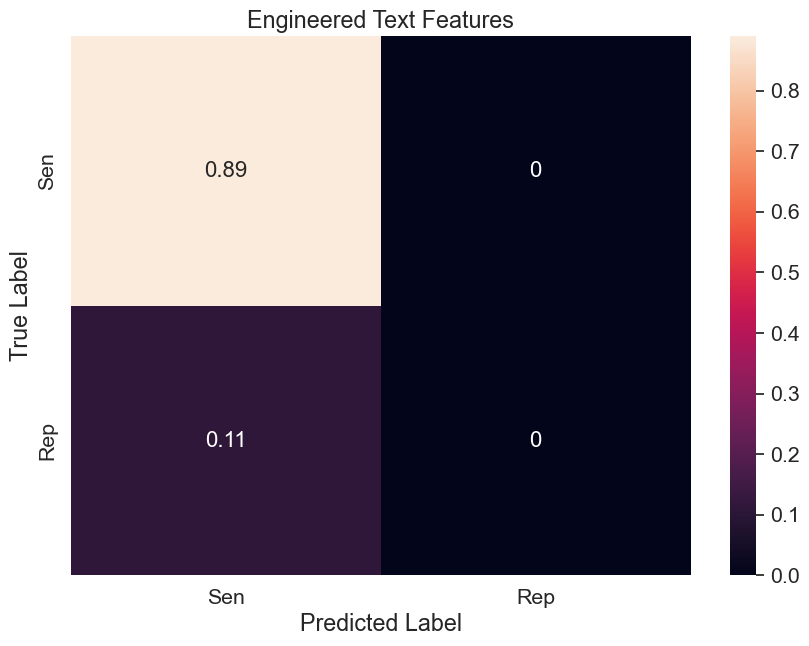

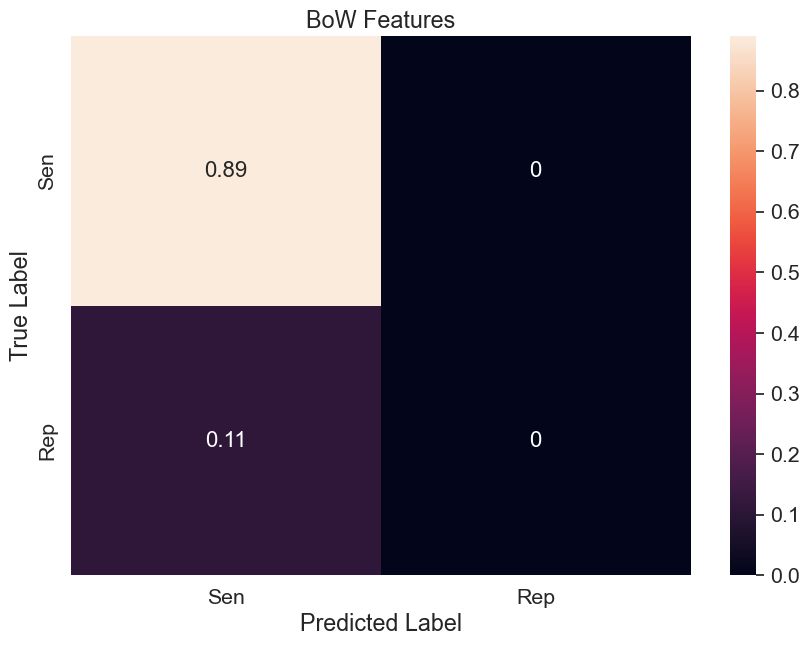

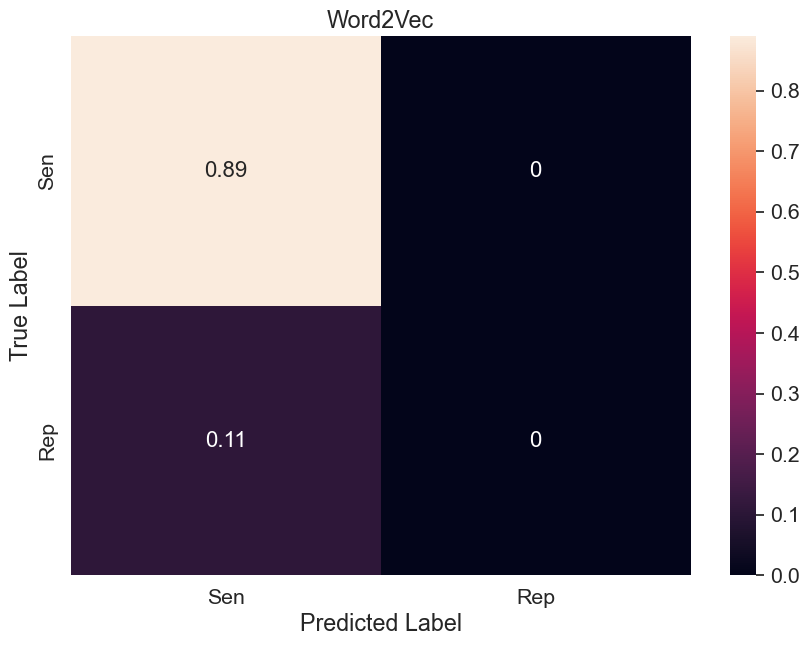

In [87]:
# loop over each dataframe, apply a logit classification model, and create a confusion matrix
# --------
for dataframe, featurization in zip(dataframes, featurization_technique):
    
    # changing column names to strings because some are integer
    dataframe.columns = dataframe.columns.astype(str) 
    
    # split data
    # ----------
    X_train, X_test, y_train, y_test = train_test_split(dataframe,         # specify features
                                                        y,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility
    # apply Logit model 
    # ----------
    # initalize Logit model 
    logit_reg = LogisticRegression() # set max_iter = 500

    # fit the model to our data
    logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset

    # predict on test set
    y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
    cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "pred") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
    df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
    df_cm = df_cm.rename(index=str, 
                         columns={0: "Sen", 
                                  1: "Rep"})

    # specify confusion matrix index for clarity
    df_cm.index = ["Sen", "Rep"]
    
    # figure specifications 
    plt.figure(figsize = (10,7)) # set figure size specifications
    sns.set(font_scale=1.4)      # set label size
    sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
    # figure labels
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [88]:
# model initalization and fit
# --------

mask = np.array(congress_tweets["party"] != "Independent")

ct = pd.DataFrame(congress_tweets[mask])

# initalize binarizer
lb_style = LabelBinarizer()

# fit LabelBinarizer to our data
y = ct['party_binary'] = lb_style.fit_transform(ct["party"])

dfs = [
    engineered_features[mask],
    tfidf_df[mask],
    pd.DataFrame(doc_average_embeddings)[mask],
]

names = [
    "Engineered Features",
    "BoW",
    "Word2Vec",
]

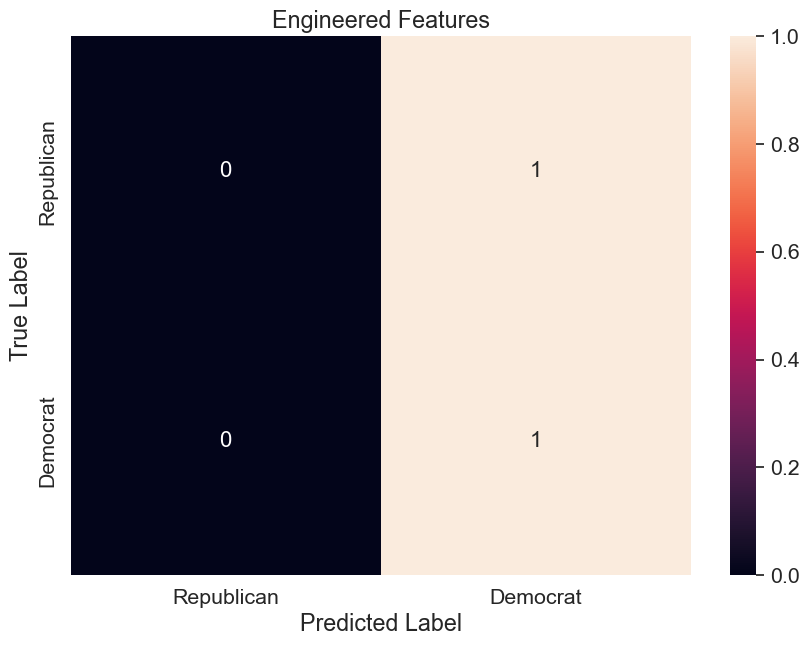

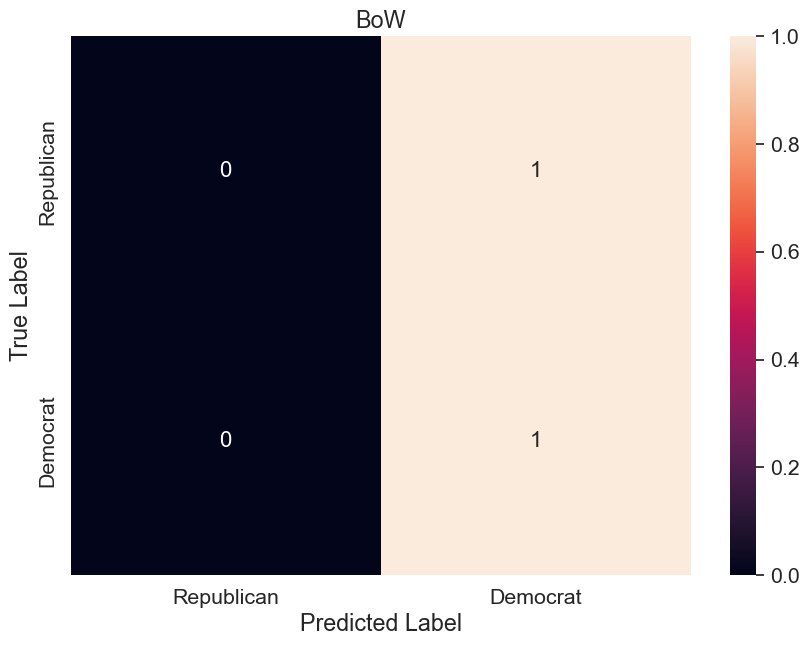

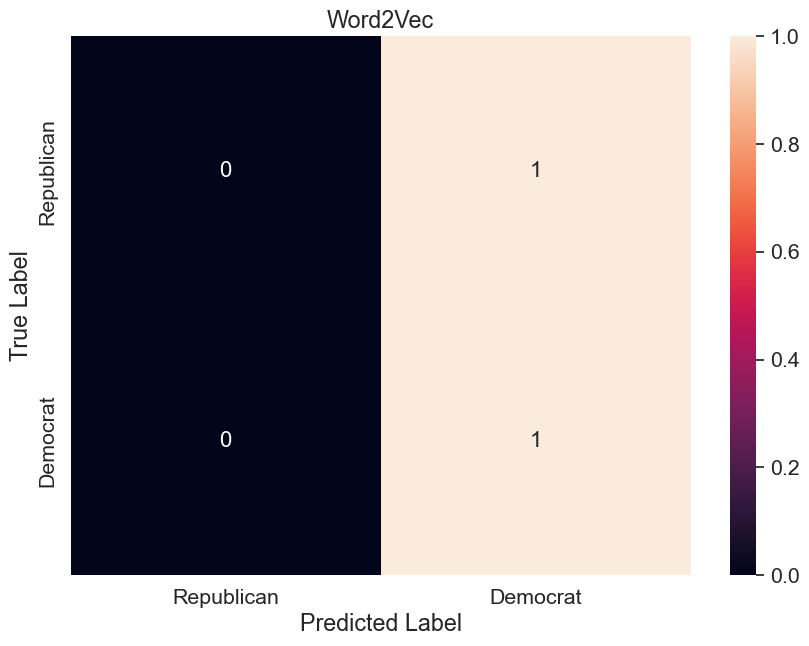

In [89]:
# loop over each dataframe, apply a logit classification model, and create a confusion matrix
# --------
for dataframe, featurization in zip(dfs, names):
    
    # changing column names to strings because some are integer
    dataframe.columns = dataframe.columns.astype(str) 

    
    # split data
    # ----------
    X_train, X_test, y_train, y_test = train_test_split(dataframe,         # specify features
                                                        y,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility
    # apply Logit model 
    # ----------
    # initalize Logit model 
    logit_reg = LogisticRegression() # set max_iter = 500

    # fit the model to our data
    logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset

    # predict on test set
    y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
    cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "true") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
    df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
    df_cm = df_cm.rename(index=str, 
                         columns={0: "Republican", 
                                  1: "Democrat"})

    # specify confusion matrix index for clarity
    df_cm.index = ["Republican", "Democrat"]
    
    # figure specifications 
    plt.figure(figsize = (10,7)) # set figure size specifications
    sns.set(font_scale=1.4)      # set label size
    sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
    # figure labels
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### Two Combined Models

In [90]:
# two models ([best text features + non-text features] * [democrat/republican, senator/representative])
# Non-text features
# --------
# select non-text features
non_text_features = congress_tweets[[  
    'state',
    'district_number',
    'trump_2016_state_share',
    'clinton_2016_state_share', 
    'obama_2012_state_share',
    'romney_2012_state_share',]]

# get dummies of non-text features
non_text_features_dummies = pd.get_dummies(non_text_features).reset_index(drop = True)


In [91]:
# combine non-text features + BoW

non_text_BoW_features = non_text_features_dummies.reset_index(drop = True).join(tfidf_df)


In [92]:
# create a list of dataframes from the objects created above
dataframes = [
              non_text_features_dummies,
              non_text_BoW_features]


# create a list of labeles based on the objects created above
featurization_technique = [
                           'Non-Text Features',
                           'Non-Text + BoW',
                           ]

In [93]:
# model initalization and fit
# --------

# initalize binarizer
lb_style = LabelBinarizer()

# fit LabelBinarizer to our data
y = congress_tweets['position_binary'] = lb_style.fit_transform(congress_tweets["position"])

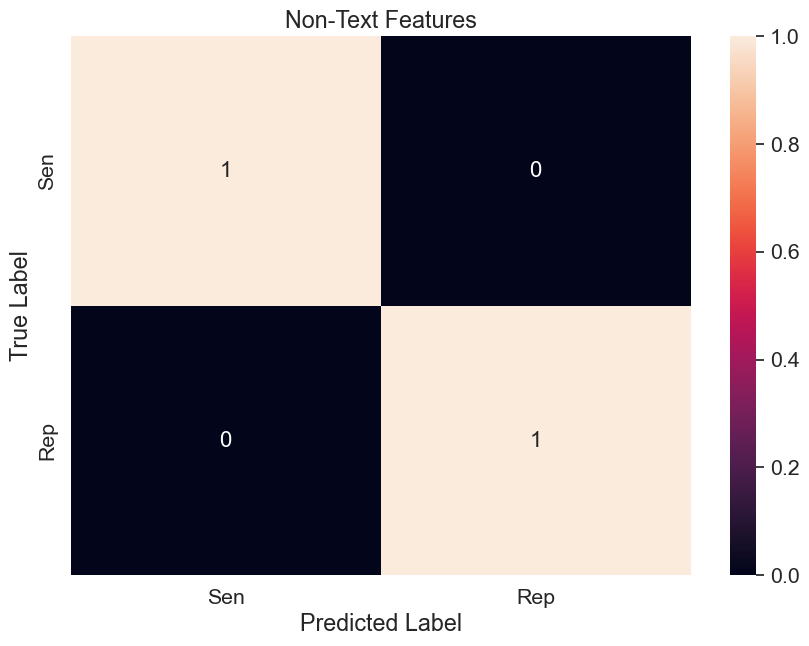

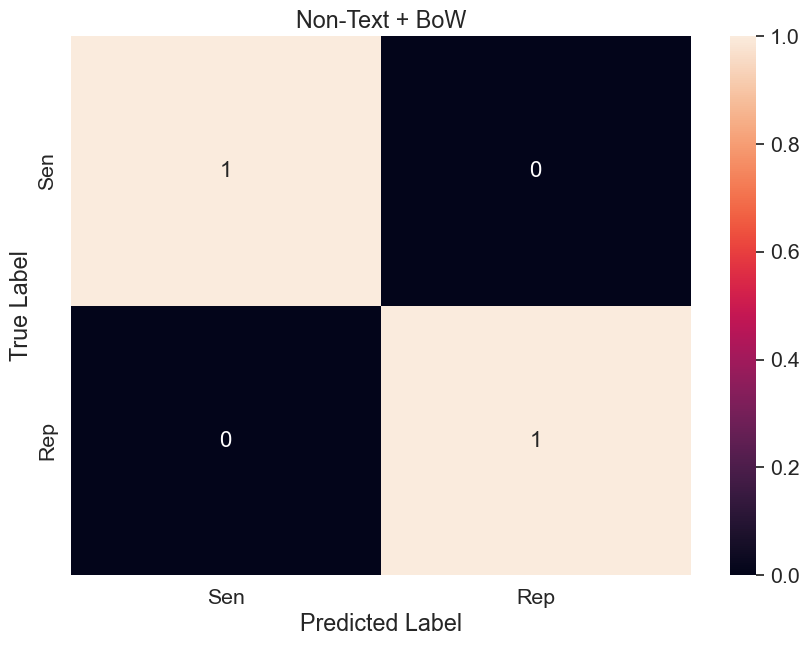

In [94]:
# loop over each dataframe, apply a logit classification model, and create a confusion matrix
# --------
for dataframe, featurization in zip(dataframes, featurization_technique):
    
    # changing column names to strings because some are integer
    dataframe.columns = dataframe.columns.astype(str) 
    
    # split data
    # ----------
    X_train, X_test, y_train, y_test = train_test_split(dataframe,         # specify features
                                                        y,                 # specify labels
                                                        train_size = .80,  # specify train split of 80%
                                                        test_size=0.20,    # specify test split of 20%
                                                        random_state = 10) # set seed for reproducibility
    # apply Logit model 
    # ----------
    # initalize Logit model 
    logit_reg = LogisticRegression() # set max_iter = 500

    # fit the model to our data
    logit_model = logit_reg.fit(X_train,         # specify feature data
                                y_train.ravel()) # specify label data --- don't forget to ravel the label dataset

    # predict on test set
    y_pred = logit_model.predict(X_test)
    
    # create a confusion matrix
    # ----------
    cf_matrix = confusion_matrix(y_test,             # specify test
                                 y_pred,             # specify predicted
                                 normalize = "pred") # normalize

    # create a pandas dataframe from the confusion matrix for visualization 
    df_cm = pd.DataFrame(cf_matrix,          # specify cf_matrix from which to create dataframe 
                         range(2), range(2)) # set 2 by 2 

    # set confusion matrix indices for clarity of visualization
    df_cm = df_cm.rename(index=str, 
                         columns={0: "Sen", 
                                  1: "Rep"})

    # specify confusion matrix index for clarity
    df_cm.index = ["Sen", "Rep"]
    
    # figure specifications 
    plt.figure(figsize = (10,7)) # set figure size specifications
    sns.set(font_scale=1.4)      # set label size
    sns.heatmap(df_cm,           # specify dataset
                annot=True,    
                annot_kws={"size": 16},
                fmt='g')
    
    # figure labels
    plt.title(featurization)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

## Discussion Questions

1. Why do standard preprocessing techniques need to be further customized to a particular corpus?

Each corpus may have their own specifications, which are not made with standard preprocessing techniques.
There may be different data structures including length and format of the text, or specific jargon that
requires targeted preprocessing. 

2. Did you find evidence for the idea that Democrats and Republicans have different sentiments in their tweets? What about Senators and Representatives?

Based on the analysis above, we did not find evidence that Democrats vs Republicans nor Senators vs Representatives have different sentiments in their tweets. 

3. Why is validating your exploratory and unsupervised learning approaches with a supervised learning algorithm valuable?

Supervised learning algorithms are valuable because it provides a comparison against an algorithm that is trained on known data. This allows us to test the accuracy of our exploratory/unsupervised learning approach.

4. Did text only, non-text only, or text and non-text features together perform the best? What is the intuition behind combining text and non-text features in a supervised learning algorithm?

Based on our analysis, we see that the non-text and text + non-text features performed the best. The intuition behind combining text + non-text features is that each set of features uniquely contributes to the predictive accuracy of the supervised learning algorithm. 